importing libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
# Upload the dataset
df =pd.read_csv("/content/drive/MyDrive/Mymainproject/weatherAUS.csv")

In [5]:
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK

In [6]:
# Drop columns with too many missing values and unnecessary features
df_cleaned = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date'])
print(df_cleaned.head())

  Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       1007.7    

In [7]:
df.shape

(142193, 24)

Missing values per column:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


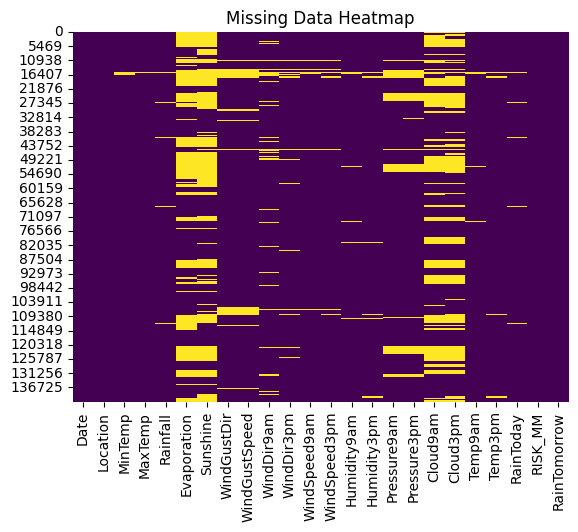

In [8]:
# Step 2: Check for Missing Data
# Display missing values per column
# Visualize missing data with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing values per column:")
print(df.isnull().sum())


sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Create a table showing missing values, percentages, and data types
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum() / df.shape[0] * 100
value = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing,
    'data type': df.dtypes
}
frame = pd.DataFrame(value)
print(frame)

               missing_values  percent_missing % data type
Date                        0           0.000000    object
Location                    0           0.000000    object
MinTemp                   637           0.447983   float64
MaxTemp                   322           0.226453   float64
Rainfall                 1406           0.988797   float64
Evaporation             60843          42.789026   float64
Sunshine                67816          47.692924   float64
WindGustDir              9330           6.561504    object
WindGustSpeed            9270           6.519308   float64
WindDir9am              10013           7.041838    object
WindDir3pm               3778           2.656952    object
WindSpeed9am             1348           0.948007   float64
WindSpeed3pm             2630           1.849599   float64
Humidity9am              1774           1.247600   float64
Humidity3pm              3610           2.538803   float64
Pressure9am             14014           9.855619   float

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RISK_MM        142193 non-nul

In [11]:
# # Encode categorical variables

categorical_cols = df_cleaned.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# If RainTomorrow is still in Yes/No format, then encode it
if df_cleaned['RainTomorrow'].dtype == 'object':
    df_cleaned['RainTomorrow'] = df_cleaned['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Check the distribution of RainTomorrow after encoding
print("Distribution of RainTomorrow after encoding:")
print(df_cleaned['RainTomorrow'].value_counts())




Distribution of RainTomorrow after encoding:
RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


In [12]:
# Handle missing values for numerical columns
numerical_cols = df_cleaned.select_dtypes(include='float64').columns
imputer = SimpleImputer(strategy='mean')
df_cleaned[numerical_cols] = imputer.fit_transform(df_cleaned[numerical_cols])

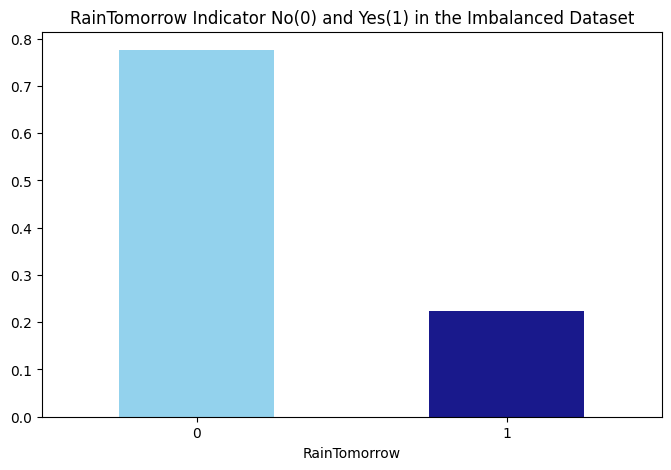

In [13]:
# Visualize Class Imbalance before Balancing
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
df_cleaned.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()


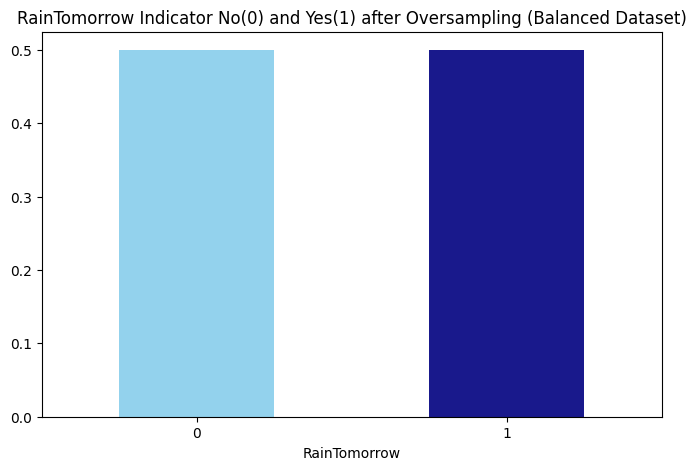

In [14]:
from sklearn.utils import resample

# Split the dataset into two groups
no = df_cleaned[df_cleaned['RainTomorrow'] == 0]
yes = df_cleaned[df_cleaned['RainTomorrow'] == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

    # Plot the balanced dataset
fig = plt.figure(figsize=(8, 5))
oversampled['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [15]:
# Split dataset into features and target
X = df_cleaned.drop(columns='RainTomorrow')
y = df_cleaned['RainTomorrow']

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Display the shape of training and testing sets
print("\nTraining and Testing Data Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Training and Testing Data Shapes:
X_train: (113754, 18), X_test: (28439, 18)
y_train: (113754,), y_test: (28439,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 4: Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))



Random Forest Model Evaluation:
Confusion Matrix:
 [[22098     0]
 [    0  6341]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439


Accuracy Score: 1.0

ROC-AUC Score: 1.0


In [20]:
from sklearn.svm import SVC

# Step 1: Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Step 2: Train the model
svm_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 4: Evaluate the model
print("\nSVM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))




SVM Model Evaluation:
Confusion Matrix:
 [[22072    26]
 [  319  6022]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     22098
           1       1.00      0.95      0.97      6341

    accuracy                           0.99     28439
   macro avg       0.99      0.97      0.98     28439
weighted avg       0.99      0.99      0.99     28439


Accuracy Score: 0.9878687717570941

ROC-AUC Score: 0.999681341629848


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input data for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()


# Train the model
history = model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))


# Make predictions
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluate Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("\nLSTM Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_lstm))
print("\nROC-AUC Score:", roc_auc_score(y_test, model.predict(X_test_lstm)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          21,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,209 (133.63 KB)

 Trainable params: 34,209 (133.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9424 - loss: 0.1510 - val_accuracy: 0.9961 - val_loss: 0.0110
Epoch 2/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9938 - loss: 0.0148 - val_accuracy: 0.9980 - val_loss: 0.0065
Epoch 3/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9955 - loss: 0.0110 - val_accuracy: 0.9959 - val_loss: 0.0099
Epoch 4/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9959 - loss: 0.0102 - val_accuracy: 0.9969 - val_loss: 0.0072
Epoch 5/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9967 - loss: 0.0081 - val_accuracy: 0.9976 - val_loss: 0.0054
Epoch 6/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9966 - loss: 0.0085 - val_accuracy: 0.9983 - val_loss: 0.0040
Epoch 7/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9975 - loss: 0.0067 - val_accuracy: 0.9967 - val_loss: 0.0076
Epoch 8/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9976 - loss: 0

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.decision_function(X_test_scaled)  # Use decision_function for SVM
evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")

# Evaluate LSTM
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
y_prob_lstm = model.predict(X_test_lstm).flatten()
evaluate_model(y_test, y_pred_lstm, y_prob_lstm, "LSTM")



Random Forest Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC Score: 1.0

Confusion Matrix:
 [[22098     0]
 [    0  6341]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439


SVM Model Evaluation:
Accuracy: 0.9878687717570941
Precision: 0.9957010582010583
Recall: 0.9496924775272039
F1-Score: 0.9721527161191379
ROC-AUC Score: 0.9996813309249992

Confusion Matrix:
 [[22072    26]
 [  319  6022]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     22098
           1       1.00      0.95      0.97      6341

    accuracy                           0.99     28439
   macro avg       0.99 

In [ ]:
# from sklearn.model_selection import cross_val_score

# # Cross-validation
# cv_scores = cross_val_score(rf_model, X_test_scaled, y_test, cv=5)
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())

In [23]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_test_scaled, y_test, cv=5)
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Random Forest Mean CV Accuracy:", cv_scores_rf.mean())

# Cross-validation for SVM
cv_scores_svm = cross_val_score(svm_model, X_test_scaled, y_test, cv=5)
print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Mean CV Accuracy:", cv_scores_svm.mean())


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean CV Accuracy: 1.0

SVM Cross-Validation Scores: [0.96589311 0.96888186 0.96993671 0.96800281 0.96887638]
SVM Mean CV Accuracy: 0.9683181742751314


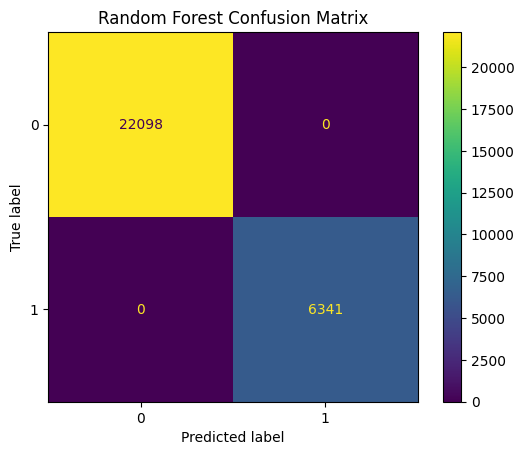

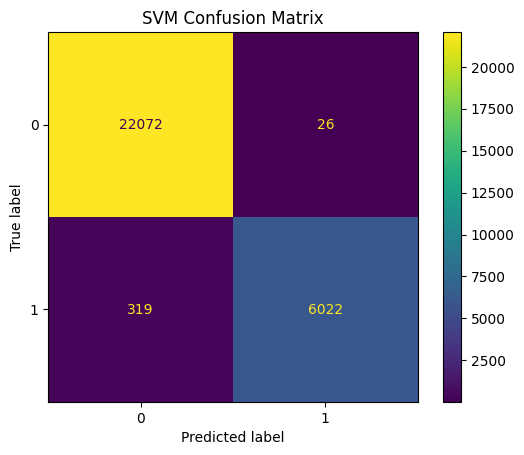

889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


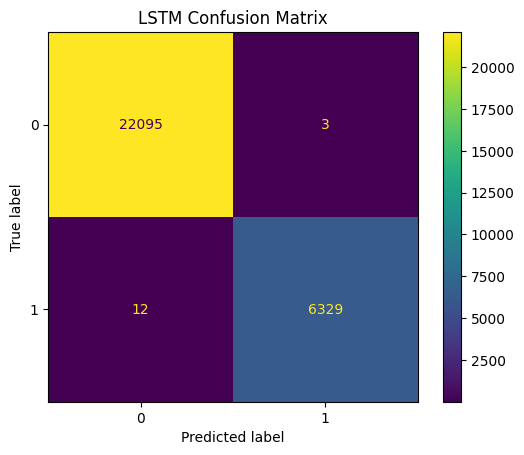

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion Matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

# Confusion Matrix for LSTM
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lstm)
plt.title("LSTM Confusion Matrix")
plt.show()


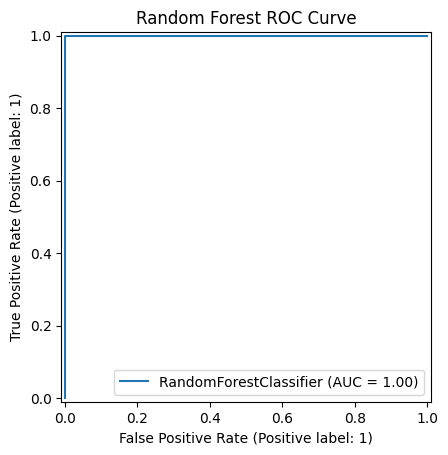

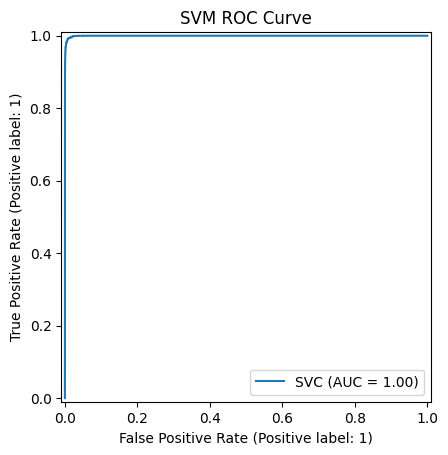

889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


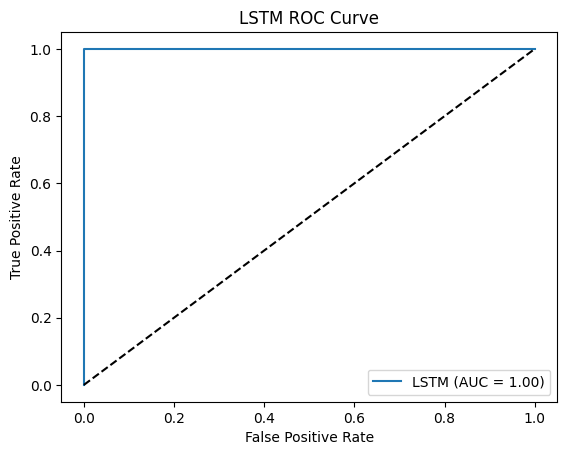

In [29]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

# ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

# ROC Curve for SVM
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("SVM ROC Curve")
plt.show()


# ROC Curve and AUC for LSTM
y_prob_lstm = model.predict(X_test_lstm).flatten()
fpr, tpr, _ = roc_curve(y_test, y_prob_lstm)
auc_lstm = roc_auc_score(y_test, y_prob_lstm)  # Calculate AUC

plt.plot(fpr, tpr, label=f"LSTM (AUC = {auc_lstm:.2f})")  # Display AUC in legend
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM ROC Curve")
plt.legend()
plt.show()


In [30]:
import pandas as pd

# Function to predict category based on probability
def predict_rainfall_scale(prob):
    if prob < 0.25:
        return "Low (Green)"
    elif prob < 0.50:
        return "Moderate (Yellow)"
    elif prob < 0.75:
        return "High (Orange)"
    else:
        return "Very High (Red)"

# Define category-to-amount mapping
rainfall_scale_mapping = {
    'Low (Green)': '0-10 mm',
    'Moderate (Yellow)': '11-50 mm',
    'High (Orange)': '51-100 mm',
    'Very High (Red)': '>100 mm'
}

# Combine function to get both scale and amount
def get_rainfall_scale_and_amount(prob):
    scale = predict_rainfall_scale(prob)
    amount = rainfall_scale_mapping[scale]
    return scale, amount

# Predict and Categorize using Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
metrics_rf = []

# Organize predictions into a list of dictionaries for DataFrame
for i, prob in enumerate(y_prob_rf[:10]):
    scale, amount = get_rainfall_scale_and_amount(prob)
    metrics_rf.append({
        # 'Prediction #': i + 1,
        # 'Probability': round(prob, 2),
        'Risk Level': scale,
        'Rainfall Amount': amount
    })

# Convert to DataFrame for a metrics table view
df_rf = pd.DataFrame(metrics_rf)
print("\nRandom Forest - Rainfall Prediction Metrics:")
print(df_rf)



Random Forest - Rainfall Prediction Metrics:
        Risk Level Rainfall Amount
0  Very High (Red)         >100 mm
1      Low (Green)         0-10 mm
2      Low (Green)         0-10 mm
3      Low (Green)         0-10 mm
4  Very High (Red)         >100 mm
5      Low (Green)         0-10 mm
6      Low (Green)         0-10 mm
7  Very High (Red)         >100 mm
8      Low (Green)         0-10 mm
9  Very High (Red)         >100 mm


In [ ]:
# import joblib
# from tensorflow import keras

# # Save Random Forest Model
# joblib.dump(rf_model, 'random_forest_model.pkl')

# # Save SVM Model
# joblib.dump(svm_model, 'svm_model.pkl')

# # Load LSTM Model using the recommended Keras format
# from tensorflow import keras

# model.save('lstm_model.keras')
# model = keras.models.load_model('lstm_model.keras')

# # Recompile the model after loading
# model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])



In [31]:
def get_alert(prediction_prob):
    if prediction_prob < 0.2:
        return "Green"
    elif prediction_prob < 0.5:
        return "Yellow"
    elif prediction_prob < 0.8:
        return "Orange"
    else:
        return "Red"


In [32]:
# Predict probabilities using Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Get both rainfall scale and alert level
rainfall_scale_rf = [get_rainfall_scale_and_amount(prob) for prob in y_prob_rf]
alert_rf = [get_alert(prob) for prob in y_prob_rf]

print("\nPredicted Rainfall (Random Forest):")
for scale, alert in zip(rainfall_scale_rf, alert_rf):
    print(f"Rainfall: {scale}, Alert: {alert}")

from collections import Counter

# Count the occurrences of each alert level for Random Forest
alert_counts = Counter(alert_rf)

print("\nSummary of Alerts (Random Forest Model):")
for alert, count in alert_counts.items():
    print(f"{alert}: {count} instances")



Predicted Rainfall (Random Forest):
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Low (Green)', '0-10 mm'), Alert: Green
Rainfall: ('Very High (Red)', '>100 mm'), Alert: Red
Rainfall: ('Low (Green)', '0-10 m

In [33]:
import joblib
from tensorflow import keras

# Save Random Forest Model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save SVM Model
joblib.dump(svm_model, 'svm_model.pkl')

# Load LSTM Model using the recommended Keras format
# from tensorflow import keras

model.save('lstm_model.keras')
model = keras.models.load_model('lstm_model.keras')

# Recompile the model after loading
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

